[reference](https://www.kaggle.com/cdeotte/one-feature-model-0-930)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from glob import glob

In [3]:
data_dir = '../input/liverpool-ion-switching/'

In [4]:
data_path = glob(data_dir + '*');data_path

['../input/liverpool-ion-switching\\sample_submission.csv',
 '../input/liverpool-ion-switching\\test.csv',
 '../input/liverpool-ion-switching\\train.csv']

In [5]:
trn_data = pd.read_csv(data_path[2]);
trn_data.head()

,time,signal,open_channels
0,0.0001,-2.7600,0
1,0.0002,-2.8557,0
2,0.0003,-2.4074,0
3,0.0004,-3.1404,0
4,0.0005,-3.1525,0


In [6]:
test_data = pd.read_csv(data_path[1])
test_data.head()

,time,signal
0,500.0001,-2.6498
1,500.0002,-2.8494
2,500.0003,-2.8600
3,500.0004,-2.4350
4,500.0005,-2.6155


In [7]:
sub_data = pd.read_csv(data_path[0])
sub_data.head()

,time,open_channels
0,500.0001,0
1,500.0002,0
2,500.0003,0
3,500.0004,0
4,500.0005,0


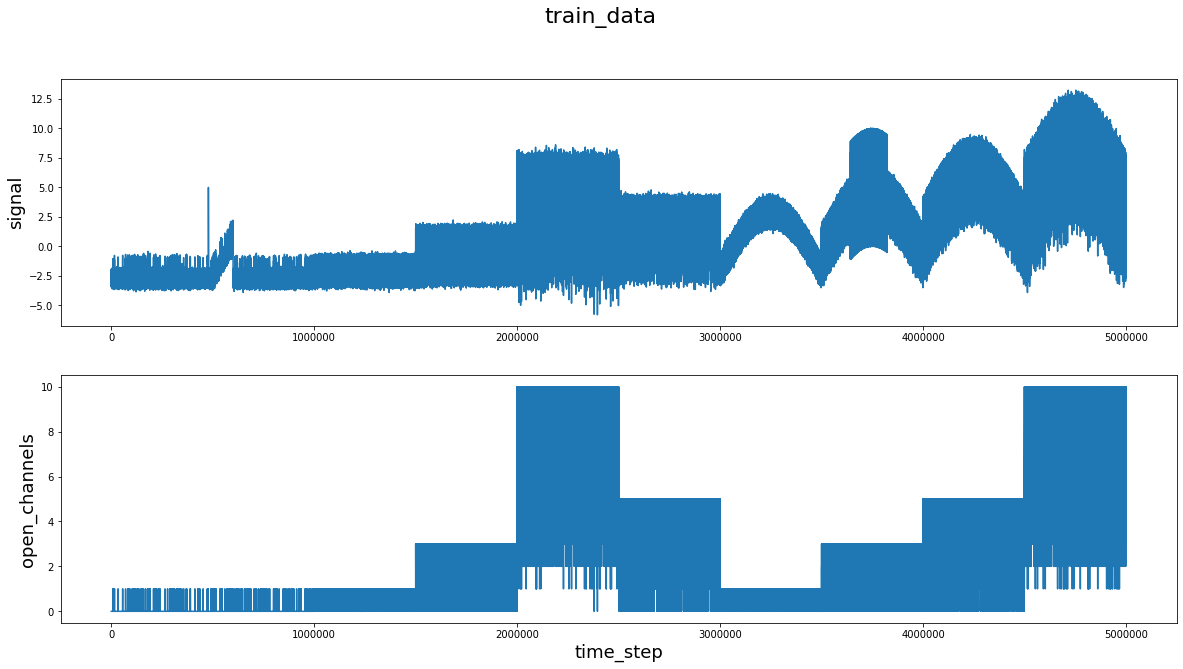

In [8]:
plt.figure(figsize=(20, 10)); res = 1
plt.suptitle('train_data', size=22)

plt.subplot(2, 1, 1)
plt.plot(trn_data['signal'][0::res])
plt.ylabel('signal', size=18)

plt.subplot(2, 1, 2)
plt.plot(trn_data['open_channels'][0::res])
plt.xlabel('time_step', size=18)
plt.ylabel('open_channels', size=18);

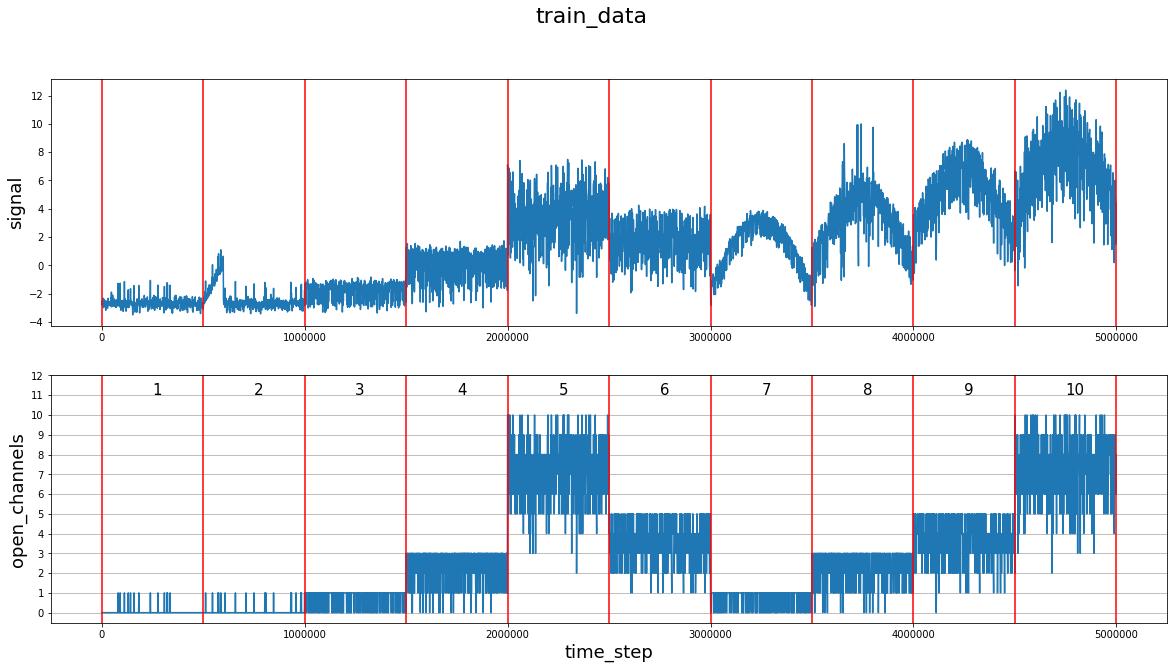

In [17]:
plt.figure(figsize=(20, 10)); res = 1000
plt.suptitle('train_data', size=22)

plt.subplot(2, 1, 1)
plt.plot(trn_data['signal'][0::res])
for i in range(11): plt.axvline(x=5e5*i , color='r')
plt.ylabel('signal', size=18)

plt.subplot(2, 1, 2)
plt.plot(trn_data['open_channels'][0::res])
for i in range(11): 
    plt.axvline(x=5e5*i , color='r')
    if i < 10:
        plt.text(x=5e5*i+2.5e5, y=11, s=str(i+1), size=15)
    
plt.yticks(ticks=range(13))
plt.grid(axis='y')
plt.xlabel('time_step', size=18)
plt.ylabel('open_channels', size=18);

From the plots above, it looks like they used 5 different synthetic models. One model produced maximum 1 channel open with low probability (batches 1 and 2). One model produced maximum 1 channel open with high probability (batches 3 and 7). One model produced maximum 3 channels open (batches 4 and 8). One model produced maximum 5 channels open (batches 6 and 9) and one model produced maximum 10 channels open (batches 7 and 10). Furthermore drift was added to batches 7, 8, 9, 10. And the beginning of batch 2.

*************************
random range
start: 1386777, end:, 1391777


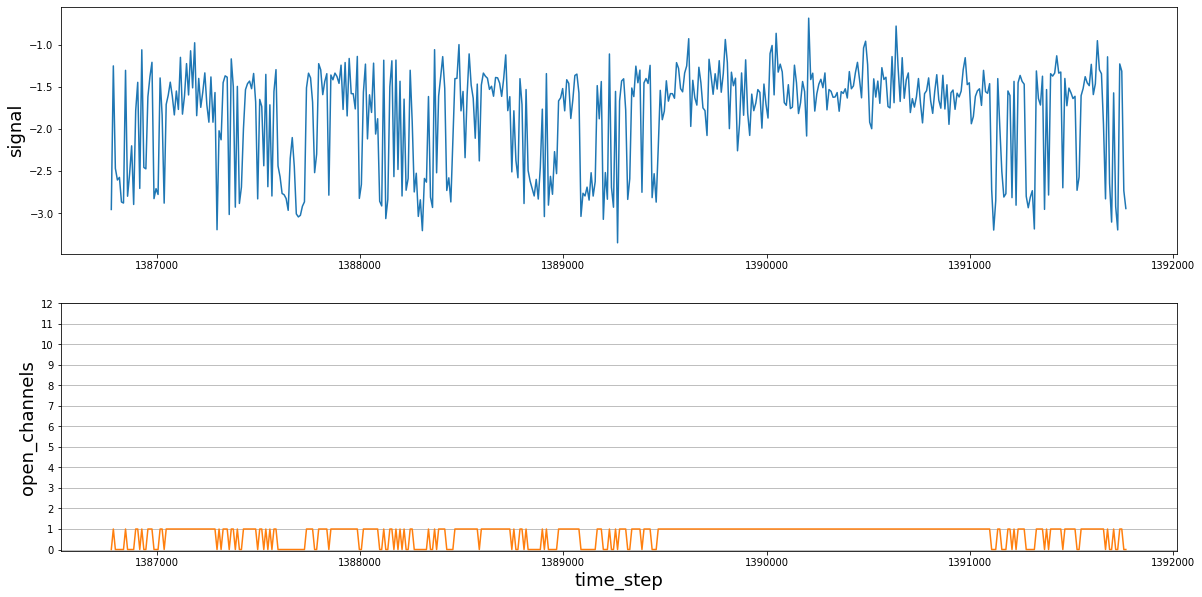

*************************
random range
start: 4333589, end:, 4338589


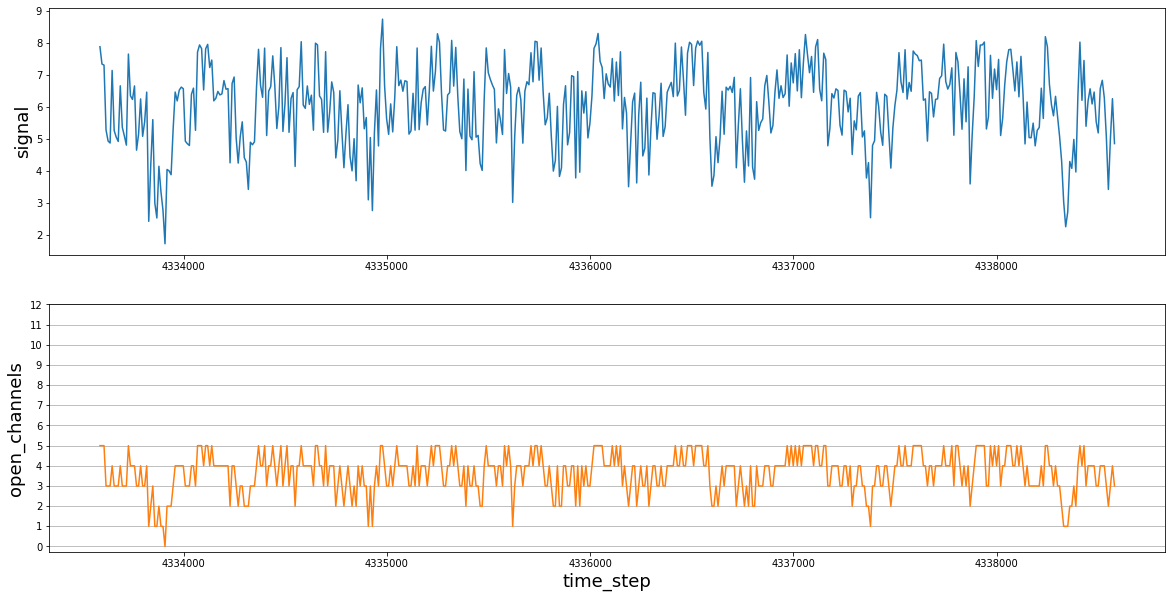

*************************
random range
start: 3632382, end:, 3637382


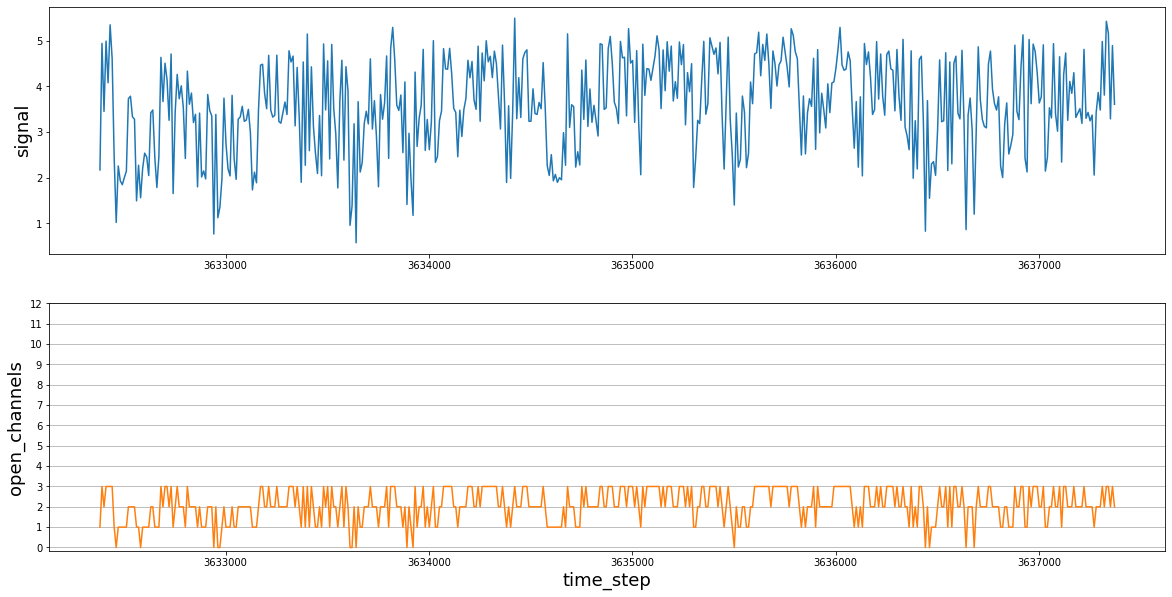

*************************
random range
start: 772726, end:, 777726


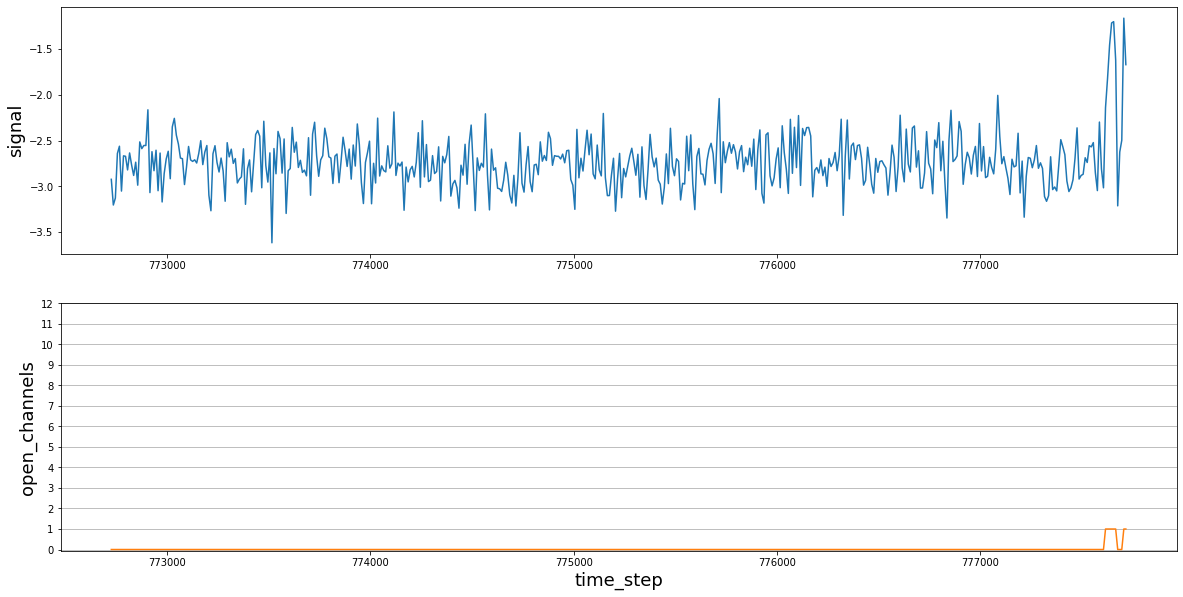

*************************
random range
start: 1536054, end:, 1541054


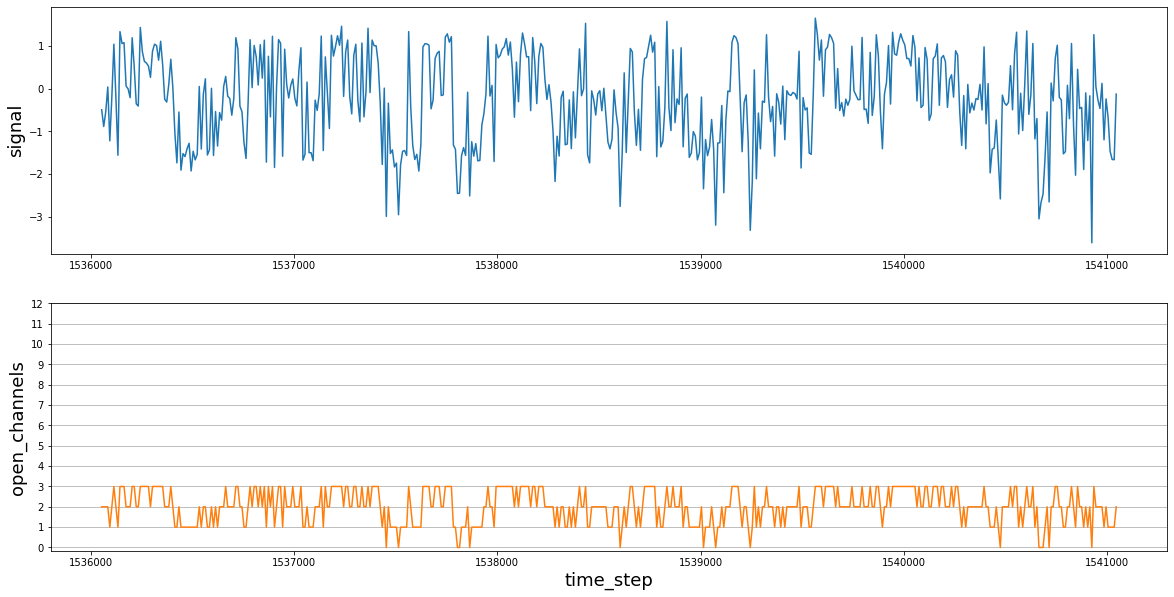

*************************
random range
start: 527543, end:, 532543


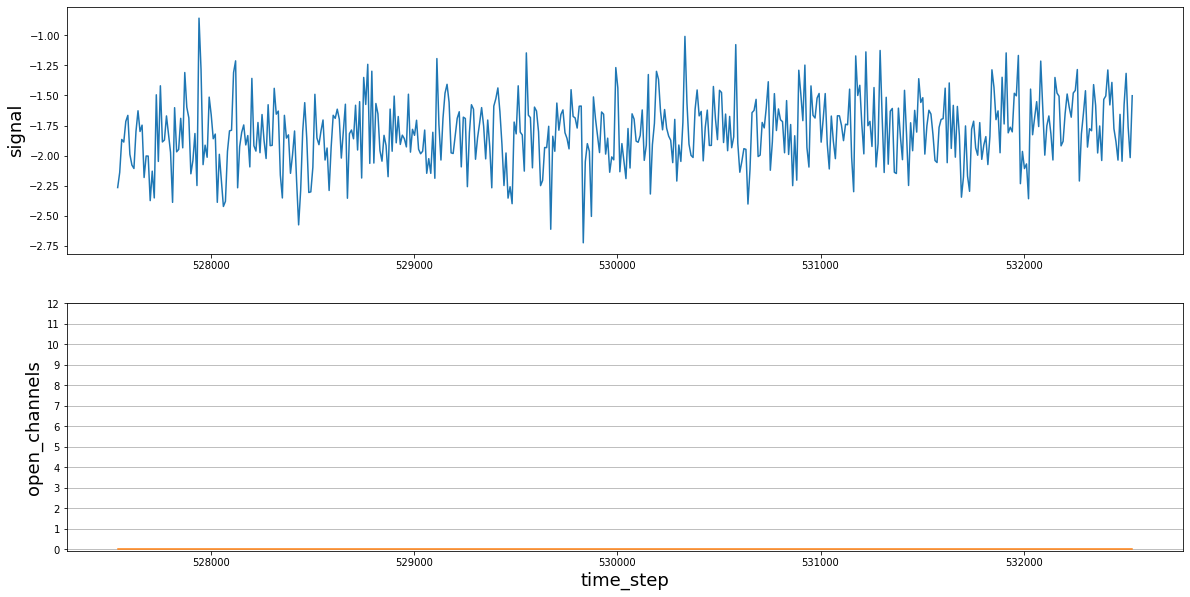

*************************
random range
start: 4966466, end:, 4971466


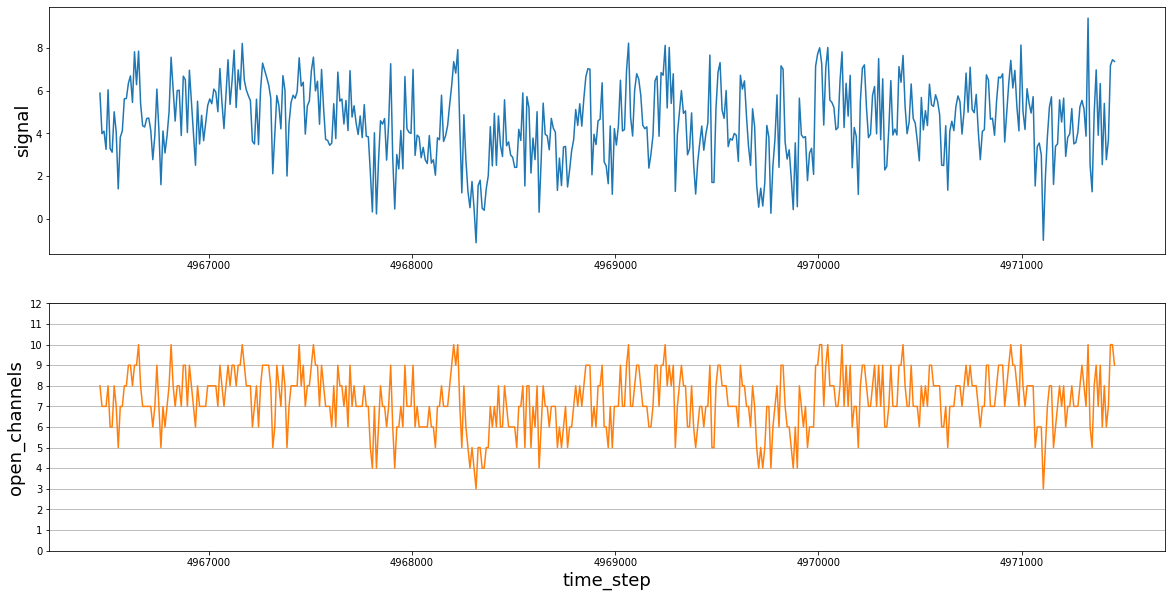

*************************
random range
start: 2747882, end:, 2752882


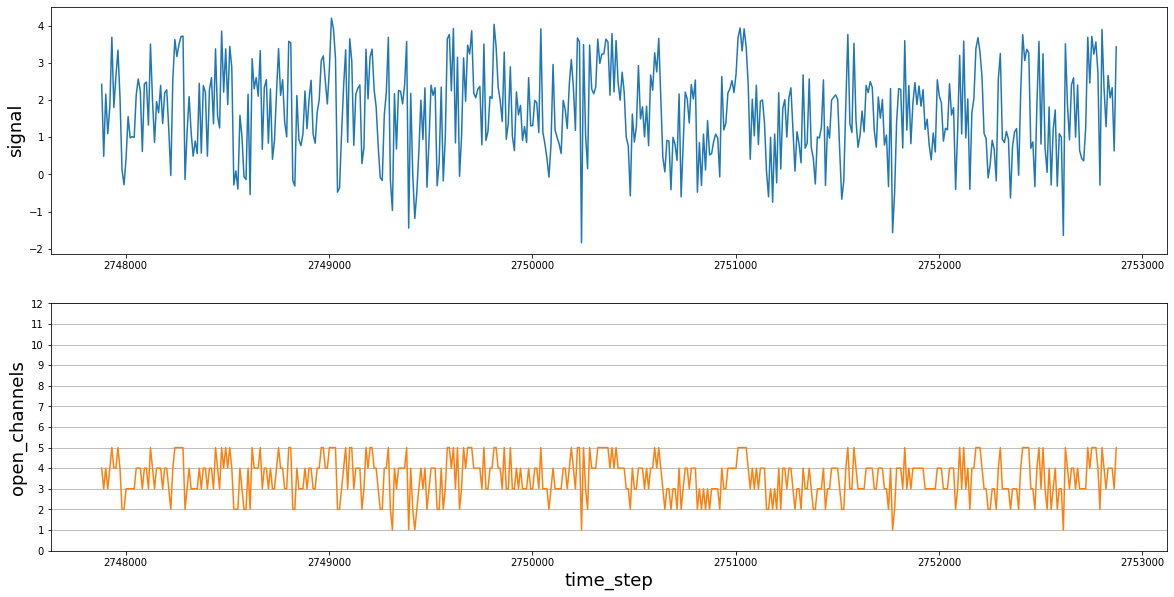

*************************
random range
start: 3585968, end:, 3590968


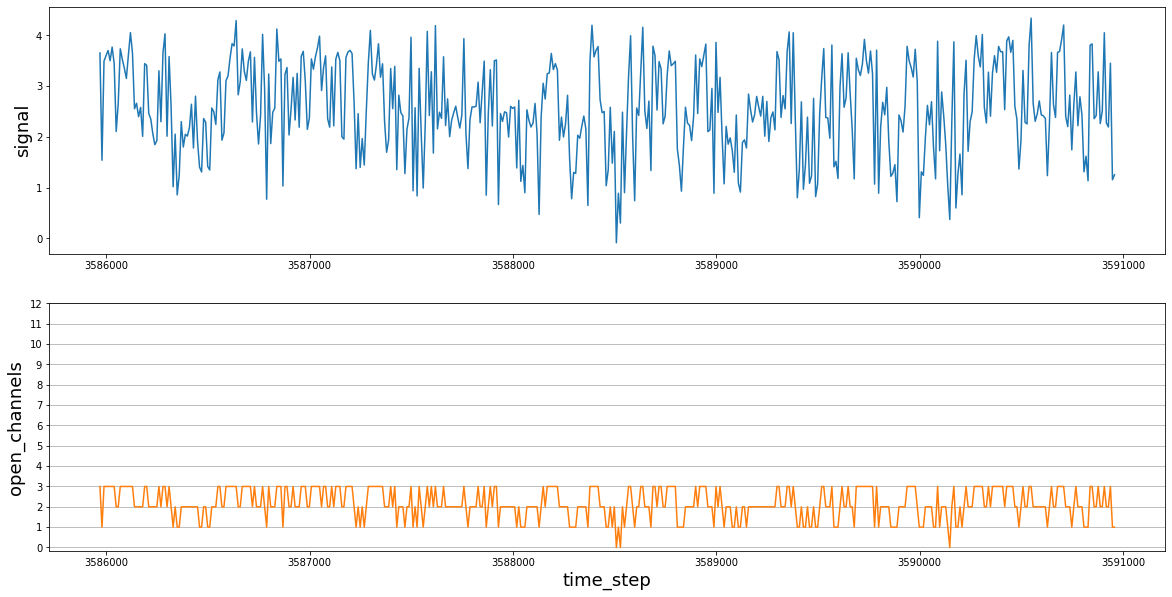

*************************
random range
start: 3762361, end:, 3767361


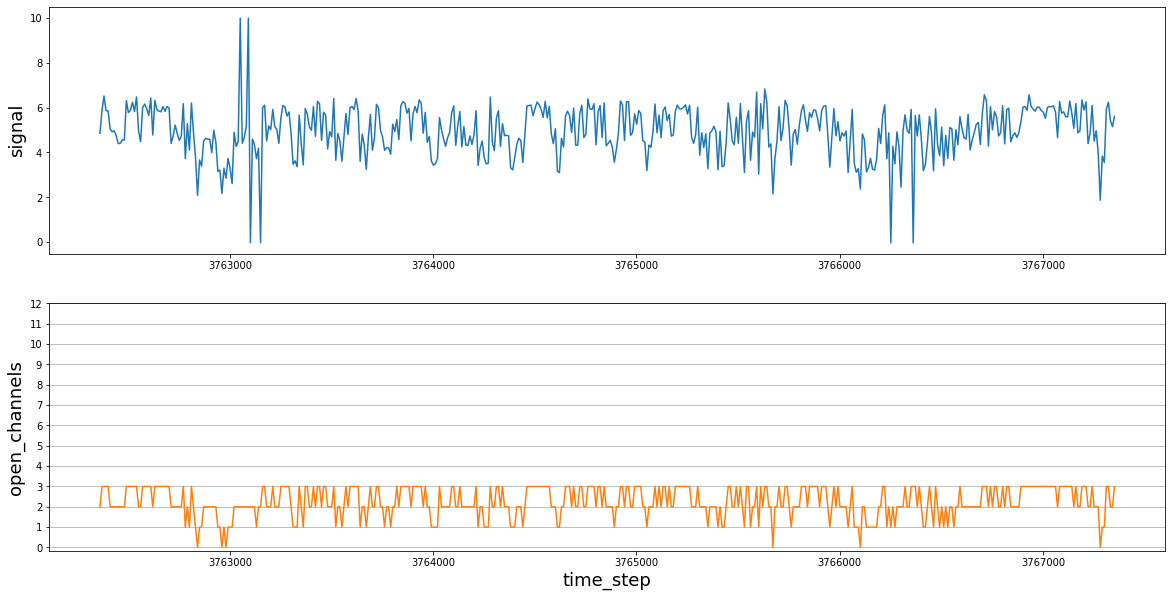

*************************
random range
start: 3000000, end:, 3500000


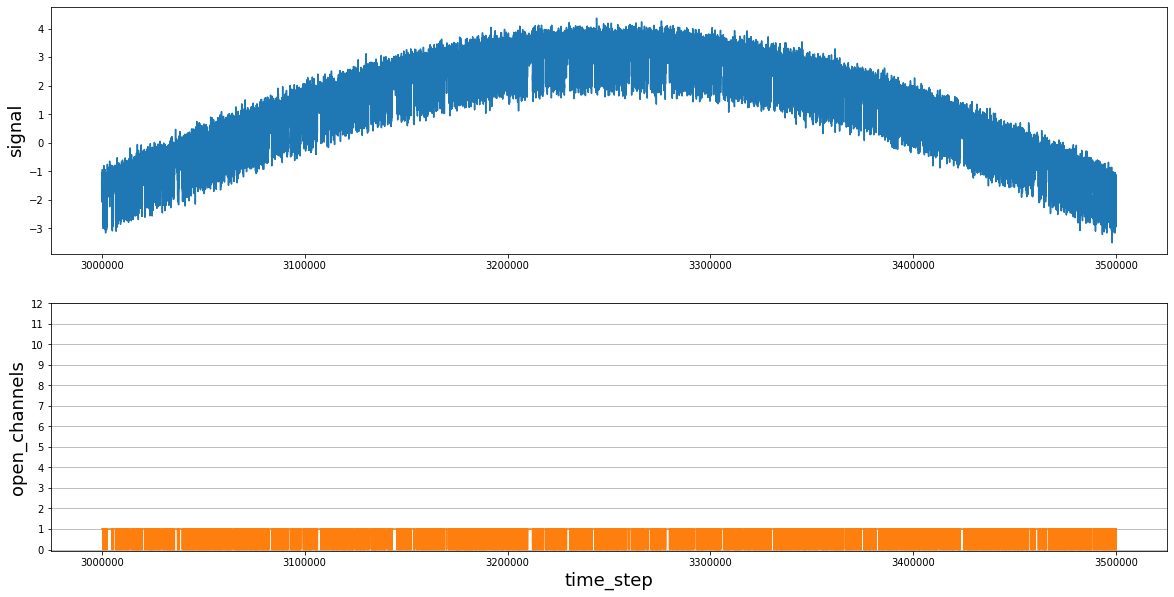

In [49]:
# Correlation Between Signal and Open Channels
for _ in range(10):
    index = int(np.random.randint(0, len(trn_data)-5e3))
    ranges = slice(index, index+5000)
    print('*' * 25)
    print('random range')
    print(f'start: {ranges.start}, end:, {ranges.stop}')
    plt.figure(figsize=(20, 10)); res = 10

    plt.subplot(2, 1, 1)
    plt.plot(trn_data['signal'][ranges][::res])
    plt.ylabel('signal', size=18)

    plt.subplot(2, 1, 2)
    plt.plot(trn_data['open_channels'][ranges][::res], color='C1')
    plt.yticks(ticks=range(13))
    plt.grid(axis='y')
    plt.xlabel('time_step', size=18)
    plt.ylabel('open_channels', size=18);
    plt.show()

res = 1000
index = int(3e6)
ranges = slice(index, index+int(5e5))
print('*' * 25)
print('random range')
print(f'start: {ranges.start}, end:, {ranges.stop}')
plt.figure(figsize=(20, 10)); res = 10

plt.subplot(2, 1, 1)
plt.plot(trn_data['signal'][ranges][::res])
plt.ylabel('signal', size=18)

plt.subplot(2, 1, 2)
plt.plot(trn_data['open_channels'][ranges][::res], color='C1')
plt.yticks(ticks=range(13))
plt.grid(axis='y')
plt.xlabel('time_step', size=18)
plt.ylabel('open_channels', size=18);
plt.show()

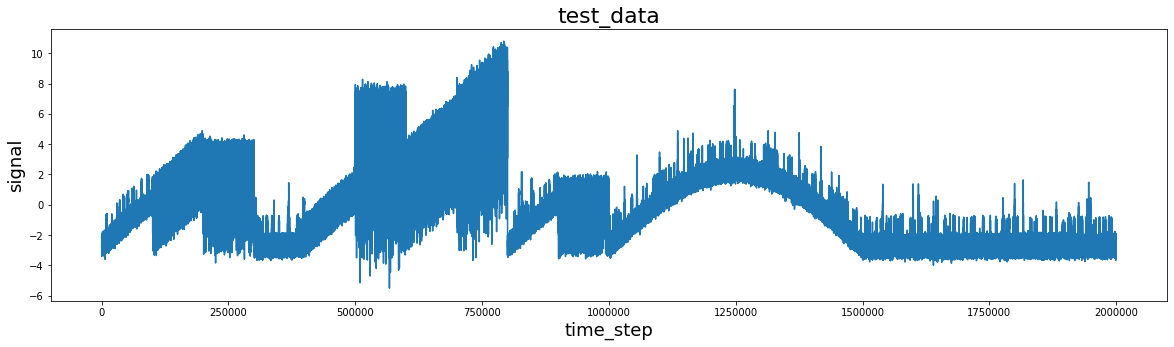

In [10]:
plt.figure(figsize=(20, 5)); res = 1
plt.plot(test_data['signal'][0::res])
plt.title('test_data', size=22)
plt.xlabel('time_step', size=18)
plt.ylabel('signal', size=18);

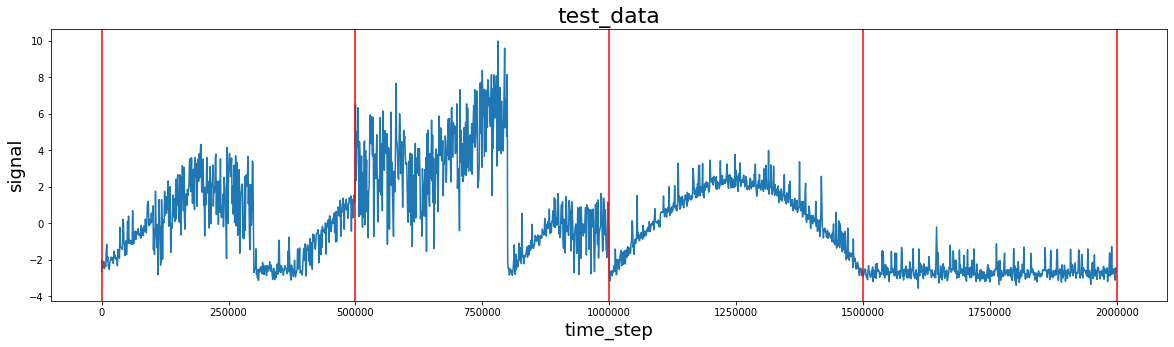

In [11]:
plt.figure(figsize=(20, 5)); res = 1000
plt.plot(test_data['signal'][0::res])
for i in range(5): plt.axvline(x=5e5*i , color='r')
plt.title('test_data', size=22)
plt.xlabel('time_step', size=18)
plt.ylabel('signal', size=18);

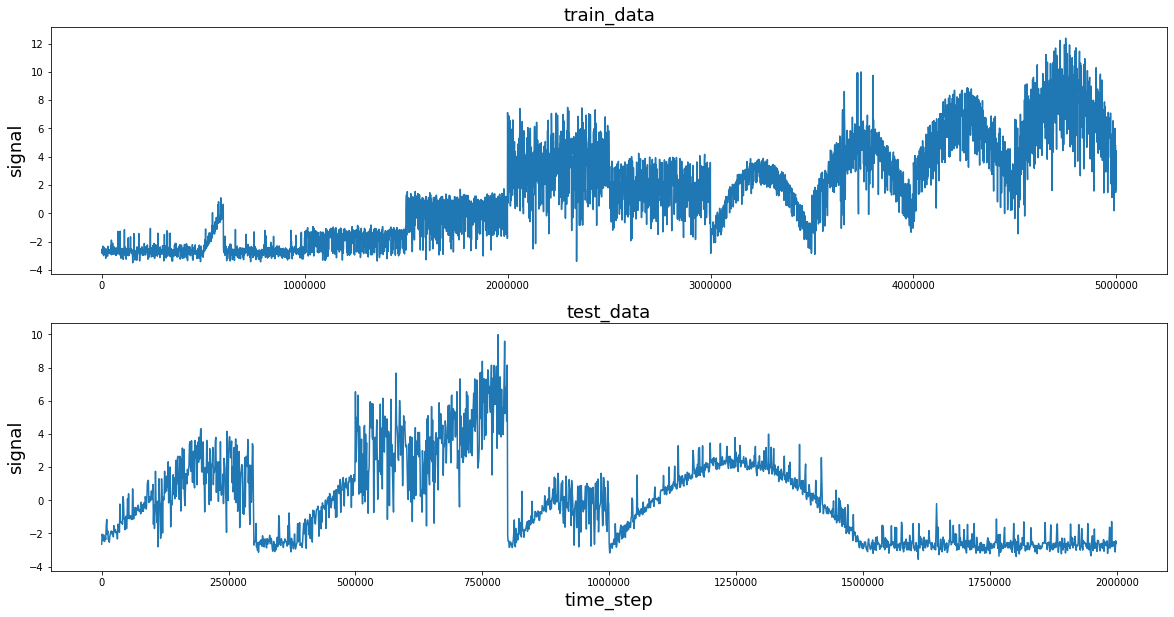

In [12]:
plt.figure(figsize=(20, 10)); res = 1000

plt.subplot(2, 1, 1)
plt.title('train_data', size=18)
plt.plot(trn_data['signal'][0::res])
plt.ylabel('signal', size=18)
# plt.xlabel('time_step', size=18)

plt.subplot(2, 1, 2)
plt.plot(test_data['signal'][0::res])
plt.title('test_data', size=18)
plt.xlabel('time_step', size=18)
plt.ylabel('signal', size=18);